In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC

TestData02.csv 파일을 불러오자

구글 드라이브를 이용할 것이라면 아래의 코드를 이용하자.

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

In [0]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/TestData02.csv",header=-1)
data.head()

,0,1,2,3
0,0.39,2.78,7.11,-8.07
1,1.65,6.70,2.42,12.24
2,5.67,6.38,3.79,23.96
3,2.31,6.27,4.80,4.29
4,3.67,6.67,2.38,16.37


In [0]:
입력 데이터 x, 출력 데이터 y 설정

In [0]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x1 = x.values
y1 = y.values.reshape(-1,1)

수동으로 출력 데이터를 0과 1 이진 데이터로 만들어 준다.

In [0]:
for i in range(len(x1)):
  if y1[i] > 0 :
    y[i] = 1
  else :
    y[i] =0

In [0]:
x1[:,0].shape, y1.shape

((500,), (500, 1))

산점도를 출력하는 데 데이터의 형태가 달라 수동으로 만든 데이터 셋은 냅두고

train_test_split 메소드를 이용해 훈련셋과 테스트셋을 나누어 주자.

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size=0.25,random_state = 0)

선형 커널을 사용하는 svm 모델을 만들고
훈련 데이터를 fit 해준다.

In [0]:
svmclf = SVC(kernel="linear")
svmclf.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

x 테스트셋을 넣어 결과를 예측한다.

In [0]:
rResult = svmclf.predict(xtest)

In [0]:
rResult

array([1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1.])

모델을 예측한 값과 ytest값을 비교하여 평가.

accuracy, precision, recall 평가

---

True Positivie(TP)	True 인데, True라고 맞춘 경우(잘한 경우)

False Positive(FP)	False 인데, True라고 한 경우(틀렸어요.)

True Negative(TN)	False 인데, False라고 맞춘 경우(잘한 경우)

False Negative(FN)	True 인데 False 라고 한 경우(틀렸어요.)


![image](https://charsyam.files.wordpress.com/2017/04/table2.png)

Accuracy	
- TP+TN/TP+TN+FP+FN	
- 30420/33376 = 0.911

Precision	
- TP/TP+FP
- 26455/27812 = 0.951

Recall 
- TP/TP+FN
- 26455/28054 = 0.943



In [0]:
from sklearn import metrics
metrics.accuracy_score(ytest,rResult), metrics.precision_score(ytest,rResult), metrics.recall_score(ytest,rResult), 

(0.904, 0.9038461538461539, 0.9791666666666666)

이번에는 Diabetes.csv 파일로 의사분류트리 모델을 만들어보자.

In [0]:
from sklearn.tree import DecisionTreeClassifier
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


필요한 열만 불러오기 위해 필요한 열 이름을 가진 변수를 생성한다.

In [0]:
sel_names = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']

입력 데이터와 출력데이터를 설정해준다.



In [0]:
x = data[sel_names].values
y = data['Outcome'].values.reshape(-1,1)
type(x),type(y)


(numpy.ndarray, numpy.ndarray)

In [0]:
x.shape,y.shape

((768, 7), (768, 1))

훈련셋과 테스트셋으로 나누어준다.

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state = 0)

의사분류트리 모델을 생성해 준후 fit  해준다.

In [0]:
dstClf = DecisionTreeClassifier()
dstClf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

테스트 데이터로 결과를 예측한다.

In [0]:
rResult = dstClf.predict(xtest)
rResult

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

만든 모델을 시각화 해보자.

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import io

In [0]:
dot_data = io.StringIO()

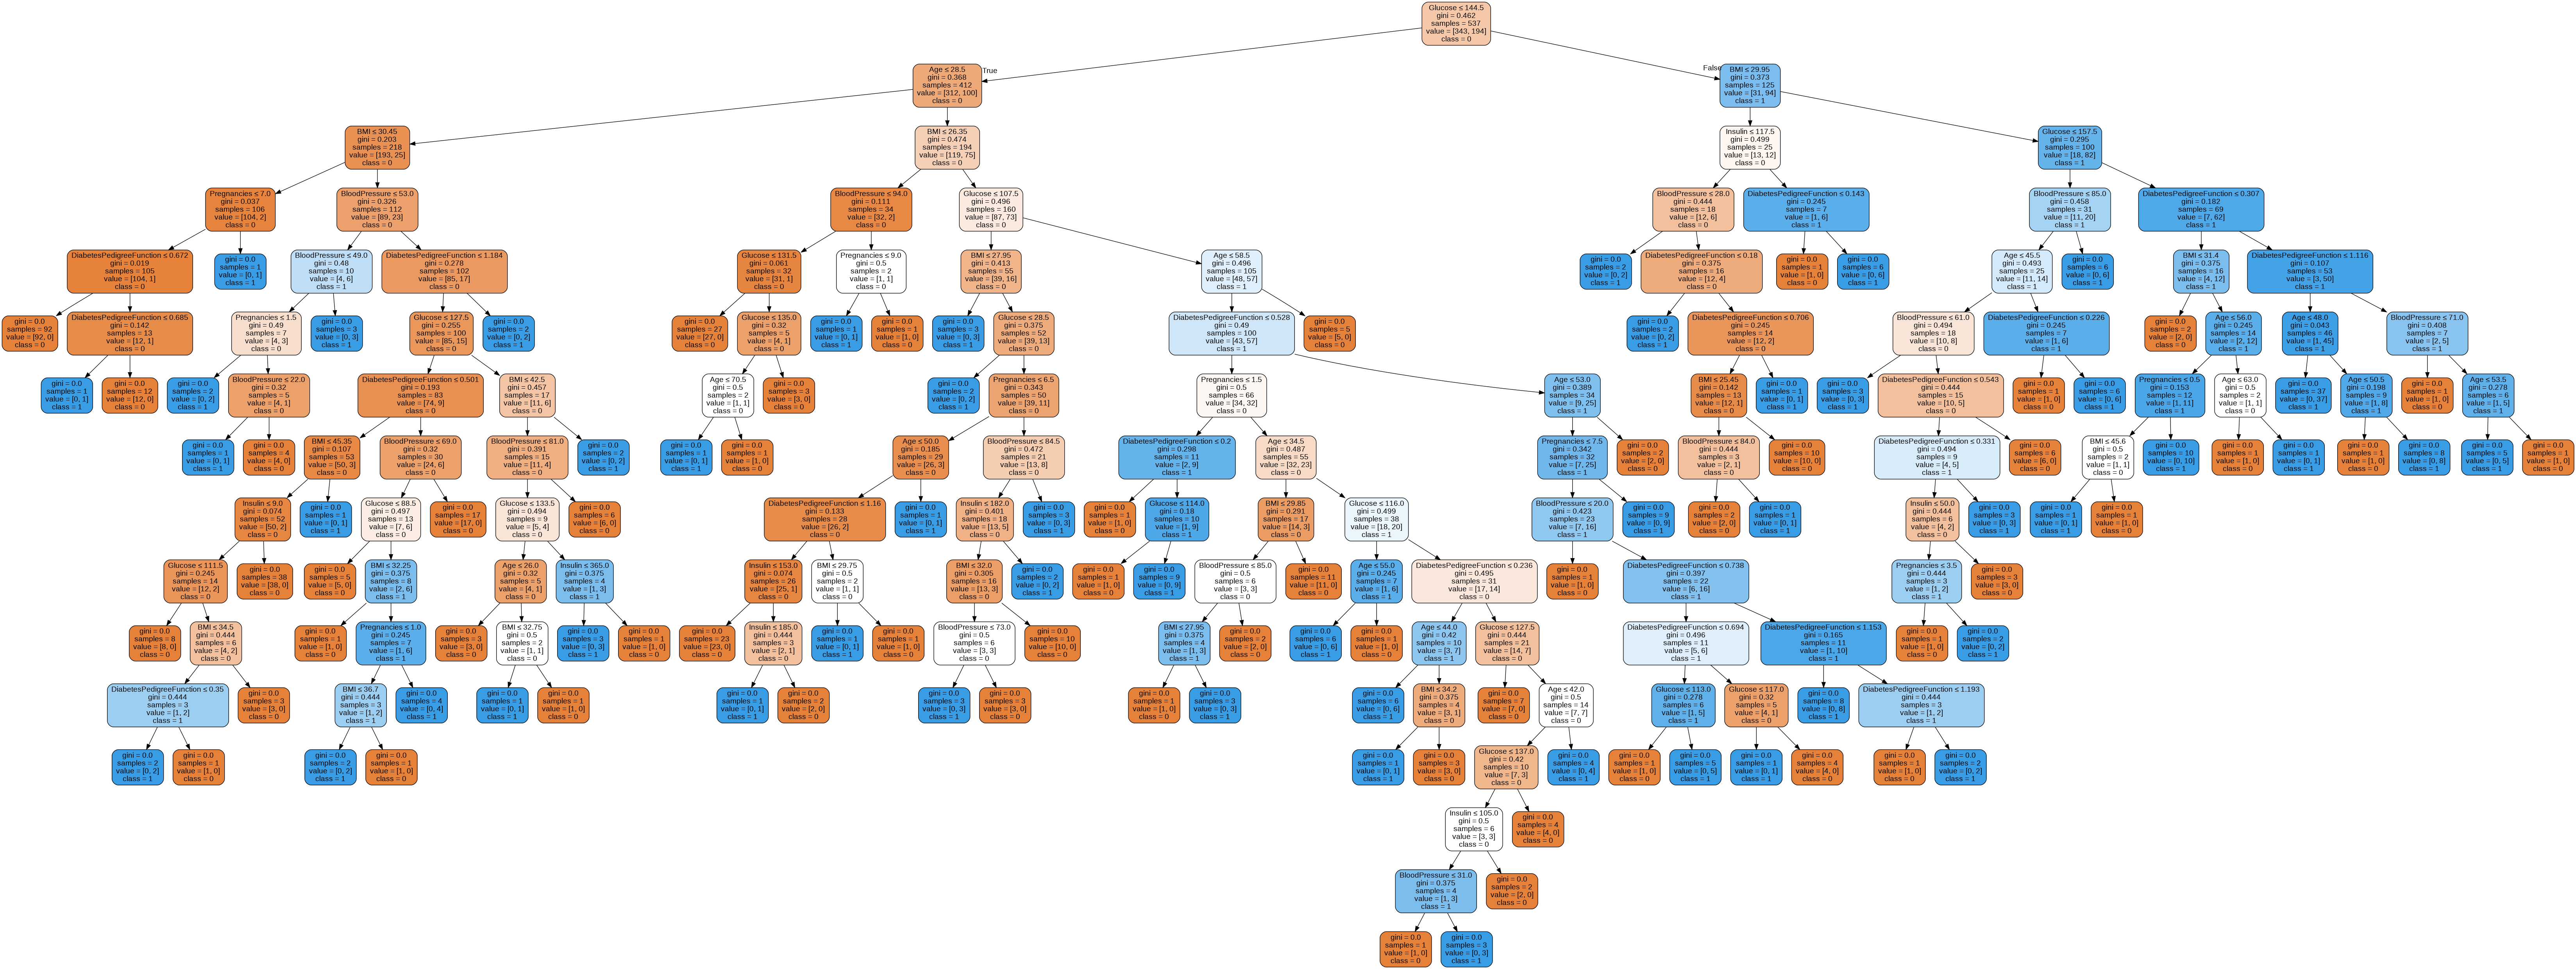

In [0]:
export_graphviz(dstClf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())